In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from livelossplot import PlotLosses
from tqdm import tnrange, tqdm_notebook
from keras import backend as K
from keras.models import Model
from keras.layers import Input, LSTM, Dense, BatchNormalization, Dropout, LeakyReLU, Lambda
from keras.layers.wrappers import TimeDistributed
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from IPython import display as dp
import os
import pickle

sns.set_style('whitegrid')
sns.despine()

dp.set_matplotlib_formats('retina')

%matplotlib inline

/Users/nickstulov/.virtualenvs/torch1venv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [ ]:
fnames = [os.path.join('data', x) for x in os.listdir('data') if x != '.DS_Store']

In [ ]:
len(fnames)

In [28]:
df = pd.read_csv('data_2.csv')
df.head()

,t,v,phi,p,q
0,0.0000,1.0,0.494677,19.98,9.67925
1,0.0001,1.0,0.494677,19.98,9.67925
2,0.0002,1.0,0.494677,19.98,9.67925
3,0.0003,1.0,0.494677,19.98,9.67925
4,0.0004,1.0,0.494677,19.98,9.67925


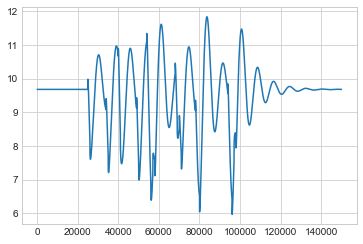

In [29]:
plt.plot(df.q)

In [ ]:
df.tail()

In [ ]:
len(df[df.t * 10000 % 1000 == 0].drop_duplicates('t'))

In [ ]:
os.mkdir('data_sparse')
os.mkdir('data_sparse_test')
os.mkdir('data_sparse_val')

In [ ]:
for prefix in tqdm_notebook(['', '_val', '_test']):
    fnames = [os.path.join('data' + prefix + '/', x) for x in os.listdir('data' + prefix) if x != '.DS_Store']
    for fname in tqdm_notebook(fnames):
        df = pd.read_csv(fname)
        df = df[df.t * 10000 % 1000 == 0].drop_duplicates('t')
        df.to_csv('data_sparse' + prefix + '/' + fname.split('/')[1], index=False)

In [ ]:
df = pd.read_csv('data_1116.csv')
df = df[df.t * 10000 % 1000 == 0].drop_duplicates('t')
df.to_csv('data_1116.csv', index=False)

In [2]:
var_names = ['$V$', '$\\varphi$', '$P$', '$Q$']

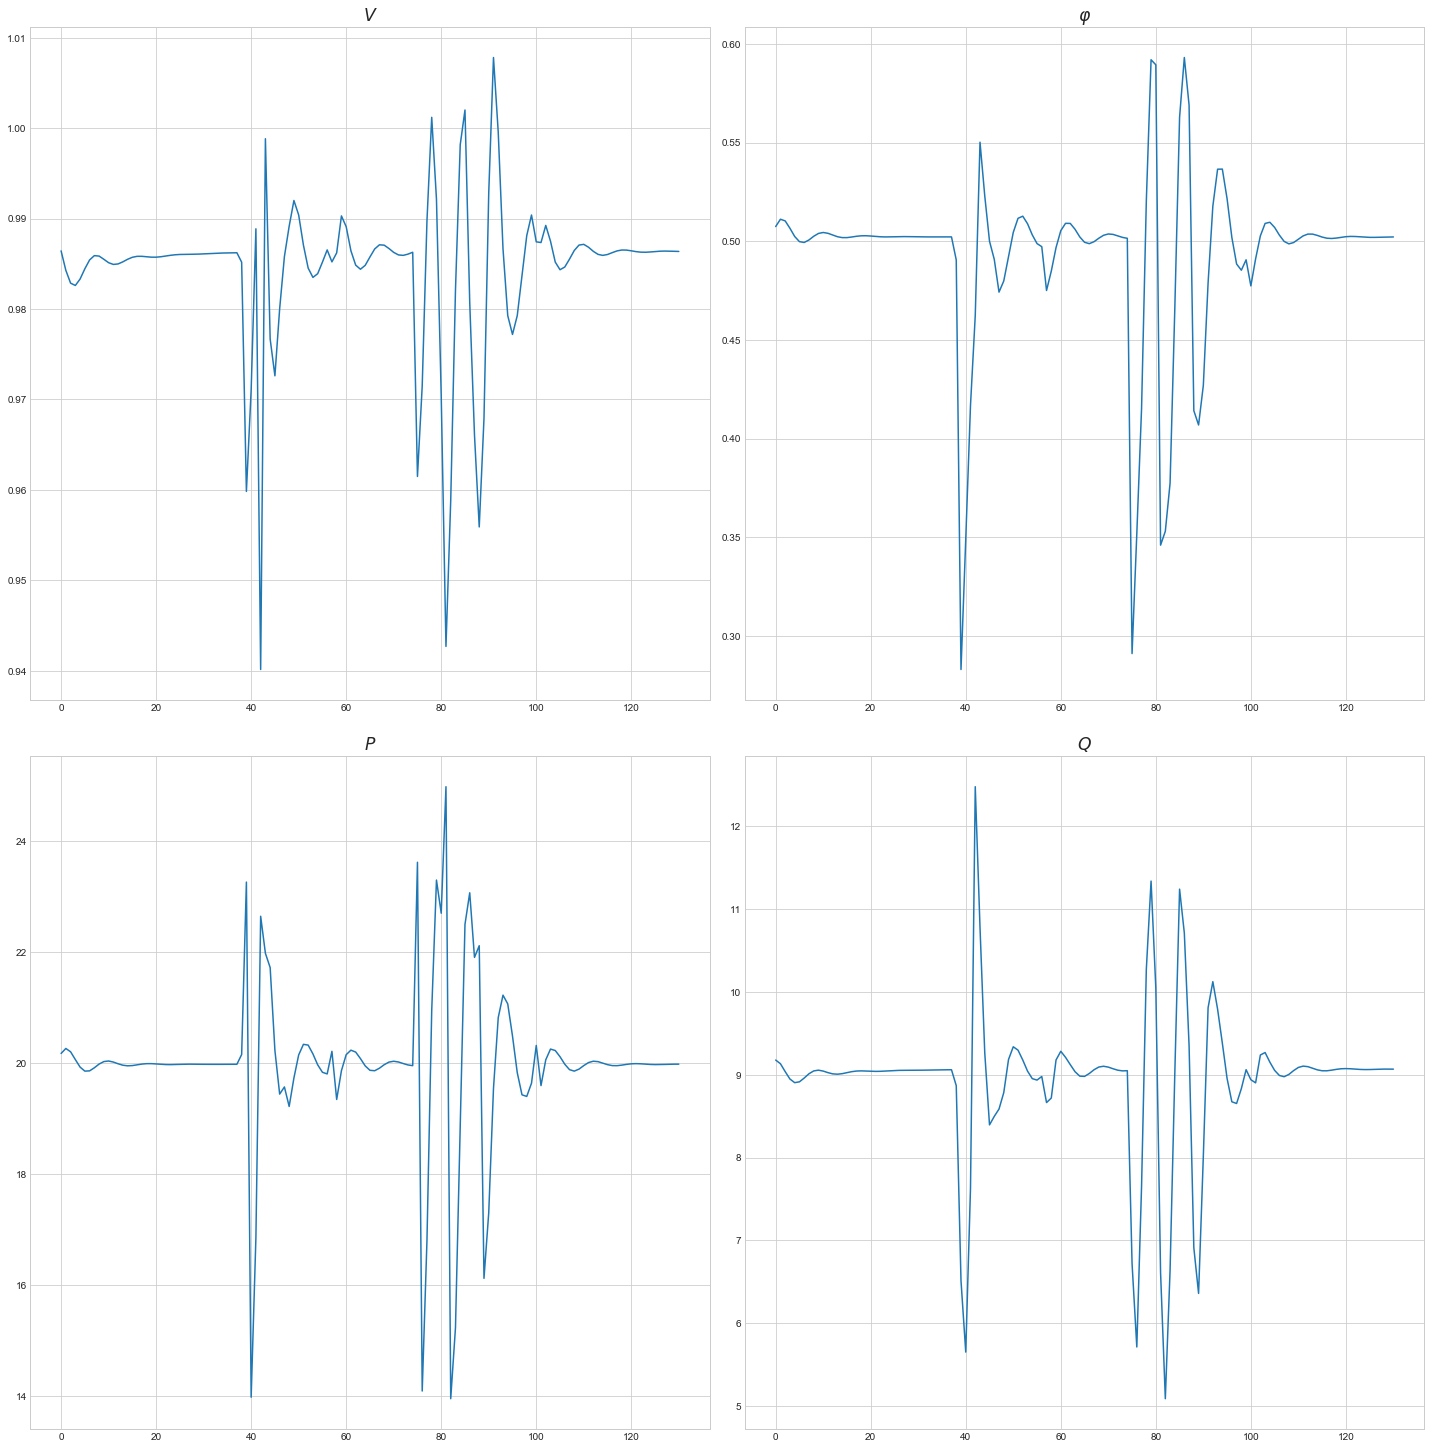

In [9]:
df = pd.read_csv('/Users/nickstulov/Downloads/data_0.csv').drop('t', 1).values
fig, axes = plt.subplots(2, 2, figsize=(20,20))
fig.tight_layout(h_pad=4.0)
for i, (ax, name) in enumerate(zip(axes.flatten(), var_names)):
    ax.plot(df[:, i])
    ax.set_title(name, fontsize='xx-large')

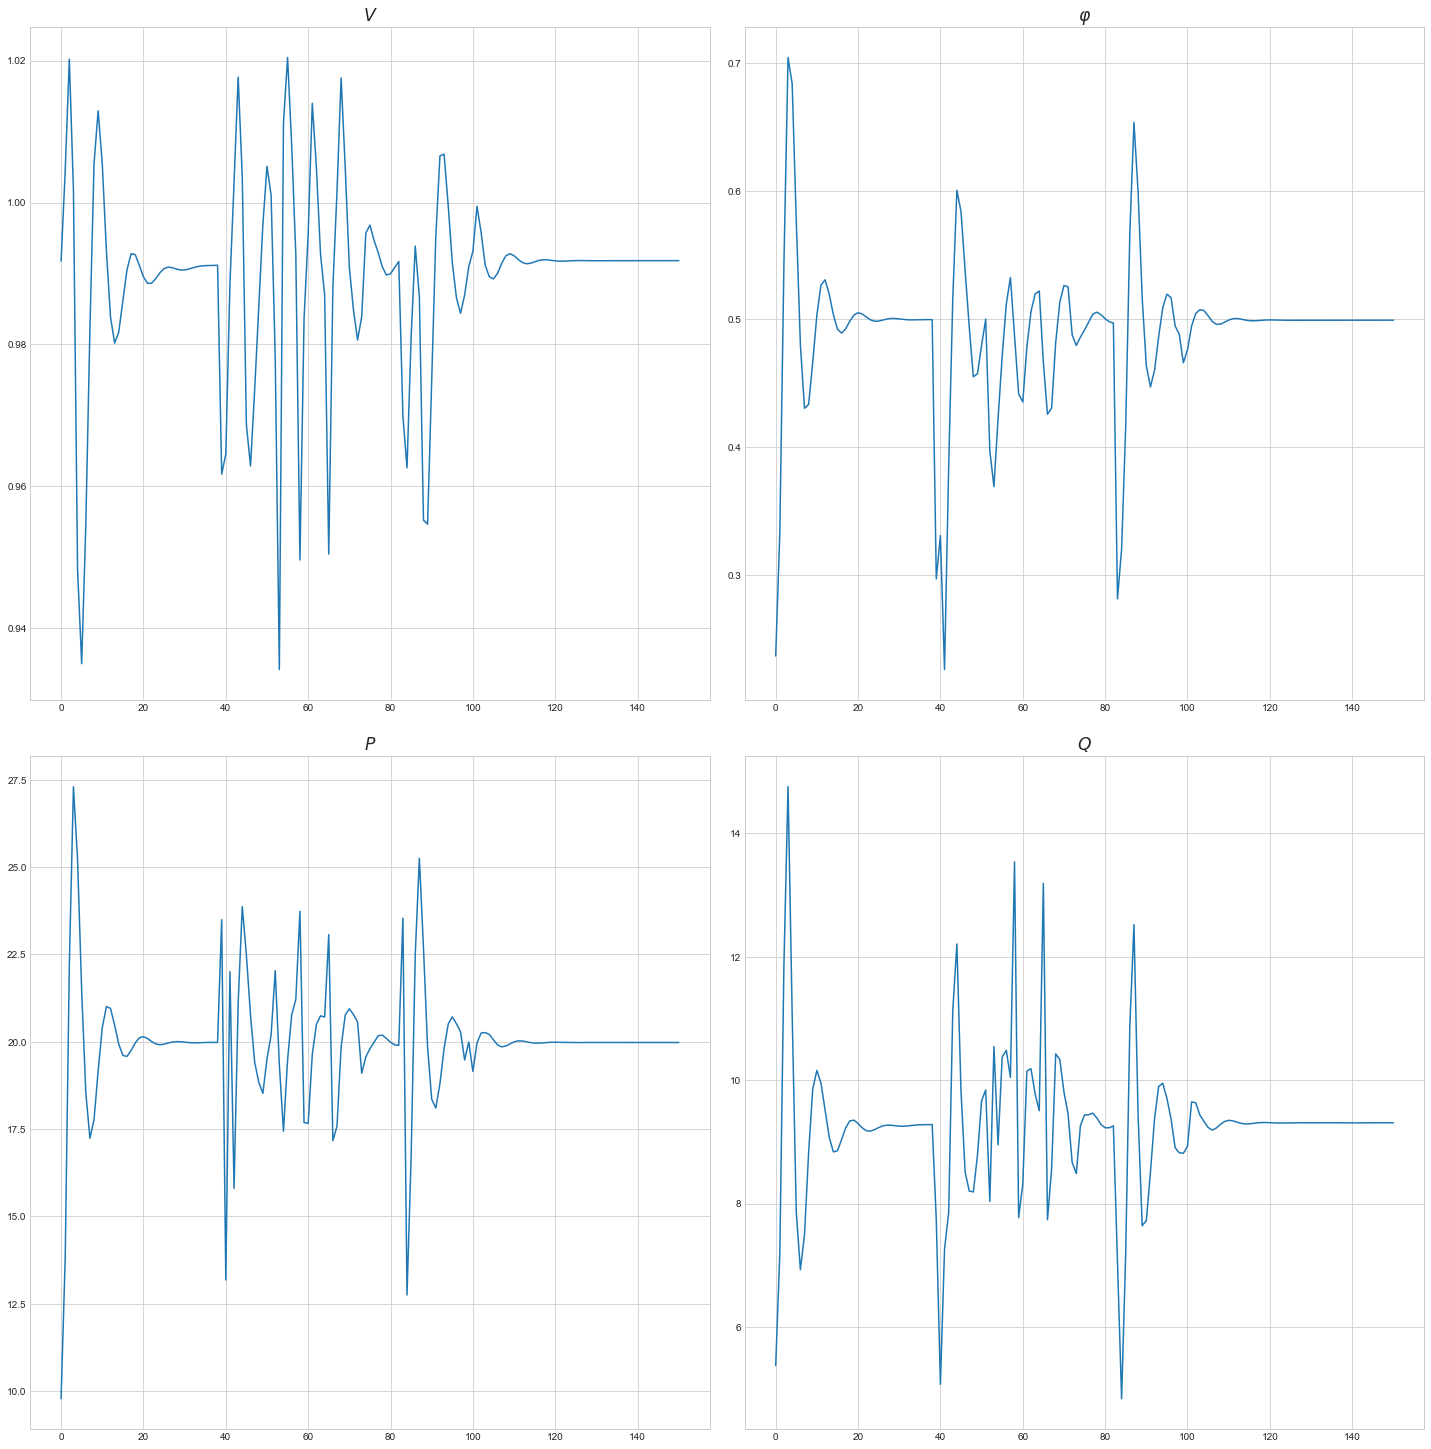

In [5]:
df = pd.read_csv('/Users/nickstulov/Downloads/data_8.csv').drop('t', 1).values
fig, axes = plt.subplots(2, 2, figsize=(20,20))
fig.tight_layout(h_pad=4.0)
for i, (ax, name) in enumerate(zip(axes.flatten(), var_names)):
    ax.plot(df[:, i])
    ax.set_title(name, fontsize='xx-large')

In [ ]:
from pyomo.dae import 